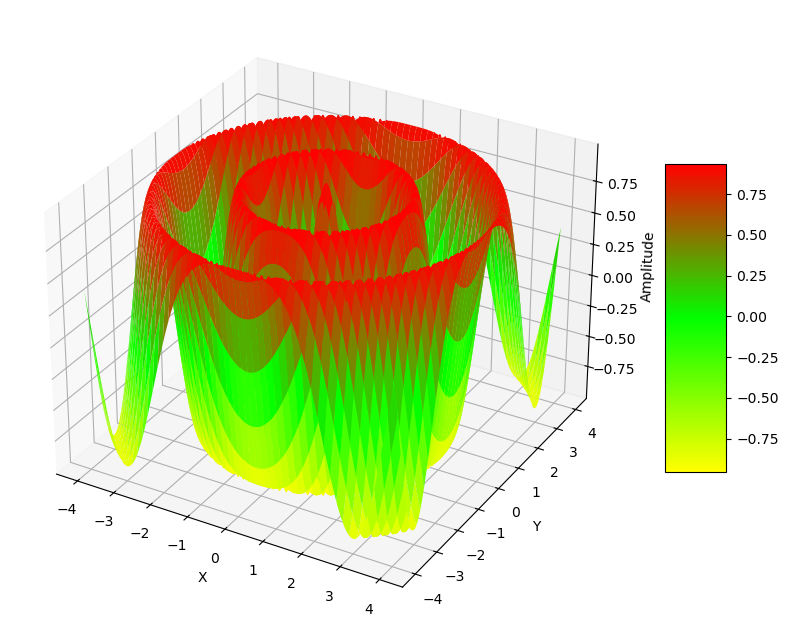

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap

# Function for the wave height
def wave_height(x, lambda_, alpha):
    return np.cos(2 * np.pi * x / lambda_) / (1 + 2 * np.pi * alpha * x / lambda_)

alpha = 1/137  # Fine-structure constant
lambda_ = 2  # Wavelength
points = 1000  # Number of points along one axis
domain_size = 4  # Size of the domain to plot

# Create a grid of points
x0 = np.linspace(-domain_size, domain_size, points)
y0 = np.linspace(-domain_size, domain_size, points)
x, y = np.meshgrid(x0, y0)

# Calculate radial distance from the origin
r = np.sqrt(x**2 + y**2)

# Calculate wave heights using the radial distance
height = wave_height(r, lambda_, alpha)

# Create a custom colormap
colors = [ (1, 1, 0), (0, 1, 0), (1, 0, 0)]  # R -> Y -> G
n_bins = [3, 6, 10]  # Discretizes the interpolation into bins
cmap_name = 'my_list'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)

# Plot the surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, height, cmap=cm)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Amplitude')
plt.savefig("./img/DilatonFieldDecay_3D.png")
# Show the plot
plt.show()


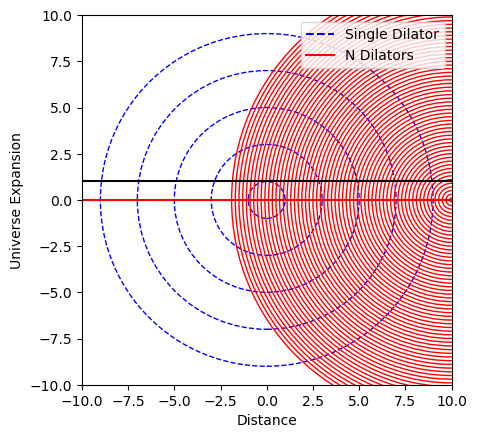

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Constants
lambda_ = 1  # Wavelength for the purpose of this visualization
N = 10  # Number of dilators in the larger mass
R = 10  # Arbitrary chosen distance for visualization
alpha = 1  # Fine structure constant for the purpose of this visualization

# Create figure and axis
fig, ax = plt.subplots()

# Plot circles for a single dilator
for i in range(1, R, 2):  # Draw circles at every other integer radius
    circle = plt.Circle((0, 0), i, color='blue', fill=False, linestyle='--')
    ax.add_patch(circle)

# Plot circles for N dilators, with a smaller effective wavelength
for i in np.arange(0.1, 1.2*R, 2 * lambda_ / N):
    circle = plt.Circle((R, 0), i, color='red', fill=False)
    ax.add_patch(circle)

# Weaker plane - single dilator
ax.axline((0, 1), slope=0, color='black', label='Weaker Plane (Single Dilator)')
# Stronger plane - 1kg of dilators
ax.axline((0, 0), slope=0, color='red', label='Stronger Plane (1kg of Dilators)')

# Set up the plot limits and labels
ax.set_xlim(-R, R)
ax.set_ylim(-R, R)
ax.set_aspect('equal')  # Equal aspect ratio to ensure circles are plotted as circles
ax.set_xlabel('Distance')
ax.set_ylabel('Universe Expansion')

# Add a legend
single_dilator_legend = plt.Line2D([0], [0], color='blue', linestyle='--', label='Single Dilator')
multiple_dilator_legend = plt.Line2D([0], [0], color='red', label='N Dilators')
ax.legend(handles=[single_dilator_legend, multiple_dilator_legend], loc='upper right')

# Display the plot
plt.savefig("./img/InteractingDilators.png")
plt.show()


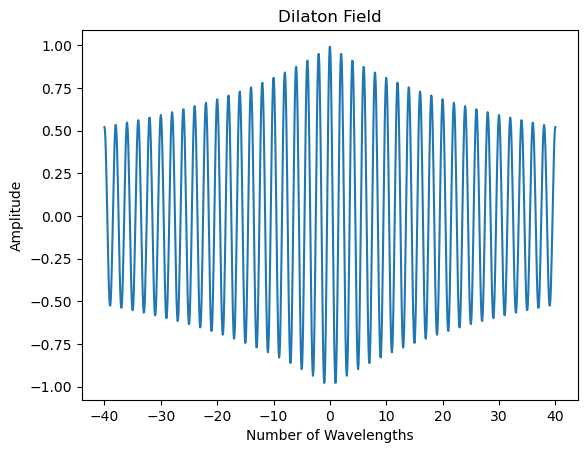

In [3]:
alpha = 1/137  # Fine-structure constant
lambda_ = 2  # Wavelength
points = 1000  # Number of points along one axis
domain_size = 40  # Size of the domain to plot
x0 = np.linspace(-domain_size, domain_size, points)
plt.plot(x0,wave_height(np.abs(x0), lambda_, alpha))
plt.title("Dilaton Field")
plt.ylabel("Amplitude")
plt.xlabel("Number of Wavelengths")
plt.savefig("./img/DilatonFieldDecay.png")
plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio

# Constants
alpha = 1/137  # Fine-structure constant
num_frames = 60  # Number of frames in the GIF
radius_increment = 0.5  # How much the wave radius increases per frame

# Output the path to the GIF
gif_path = './Drawing For Publications/'
gif_name = './Drawing For Publications//alpha_wave_decay.gif'

# Create frames
frames = []
for frame in range(num_frames):
    plt.figure(figsize=(6, 6))
    ax = plt.gca()

    # Calculate radii and amplitudes for current frame
    radii = np.linspace(0, frame * radius_increment, frame + 1)
    amplitudes = 1 / (1 + 2 * np.pi * alpha * radii)

    # Plot each circle
    for radius, amplitude in zip(radii, amplitudes):
        circle = plt.Circle((0, 0), radius, color=(0, 0, 1, amplitude), fill=False, lw=2)
        ax.add_artist(circle)

    # Adjust plot settings
    plt.xlim(-num_frames * radius_increment, num_frames * radius_increment)
    plt.ylim(-num_frames * radius_increment, num_frames * radius_increment)
    plt.axis('off')
    plt.gca().set_aspect('equal', adjustable='box')

    # Save frame
    frame_filename = gif_path + f'/data/frame_{frame}.png'
    plt.savefig(frame_filename)
    frames.append(frame_filename)
    plt.close()

# Create GIF
with imageio.get_writer(gif_name, mode='I') as writer:
    for filename in frames:
        image = imageio.imread(filename)
        writer.append_data(image)


gif_path


'./Drawing For Publications/'